In [154]:
!pip install MissForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from missforest.missforest import MissForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
df=pd.read_csv('/content/Deepression.csv')

In [7]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [8]:
df.tail()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
808,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [10]:
df.dtypes

Number                 int64
Sleep                float64
Appetite             float64
Interest             float64
Fatigue              float64
Worthlessness        float64
Concentration        float64
Agitation            float64
Suicidal Ideation    float64
Sleep Disturbance    float64
Aggression           float64
Panic Attacks        float64
Hopelessness         float64
Restlessness         float64
Low Energy           float64
Depression State      object
dtype: object

In [11]:
df.describe()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,813.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,407.000000,2.912963,2.777778,2.785185,2.964815,2.957407,2.777778,2.968519,2.964815,2.803704,2.979630,2.987037,2.964815,2.964815,2.924074
std,234.837178,1.738417,1.675610,1.680998,1.727402,1.740077,1.673394,1.719939,1.733834,1.655481,1.721185,1.708274,1.723100,1.733834,1.727163
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,407.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,610.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,813.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [12]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [13]:
df.shape

(813, 16)

In [14]:
le=LabelEncoder()
df['Depression State']=le.fit_transform(df['Depression State'])

<Axes: >

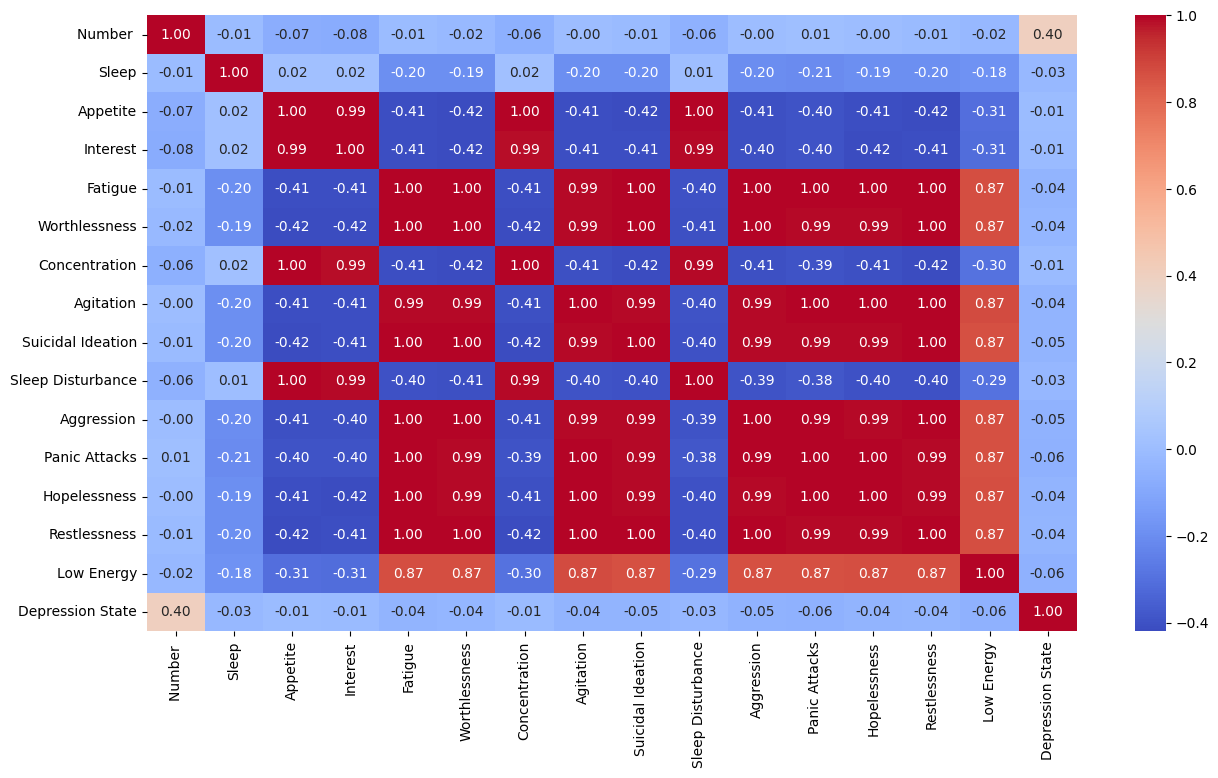

In [16]:
plt.figure(figsize=(15,8))
df_corr=df.corr()
sns.heatmap(df_corr,annot=True,cmap='coolwarm', fmt=".2f")

In [17]:
mf=MissForest()
mod_df=mf.fit_transform(df,categorical=['Depression State'])

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [19]:
mod_df.isnull().sum()

Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64

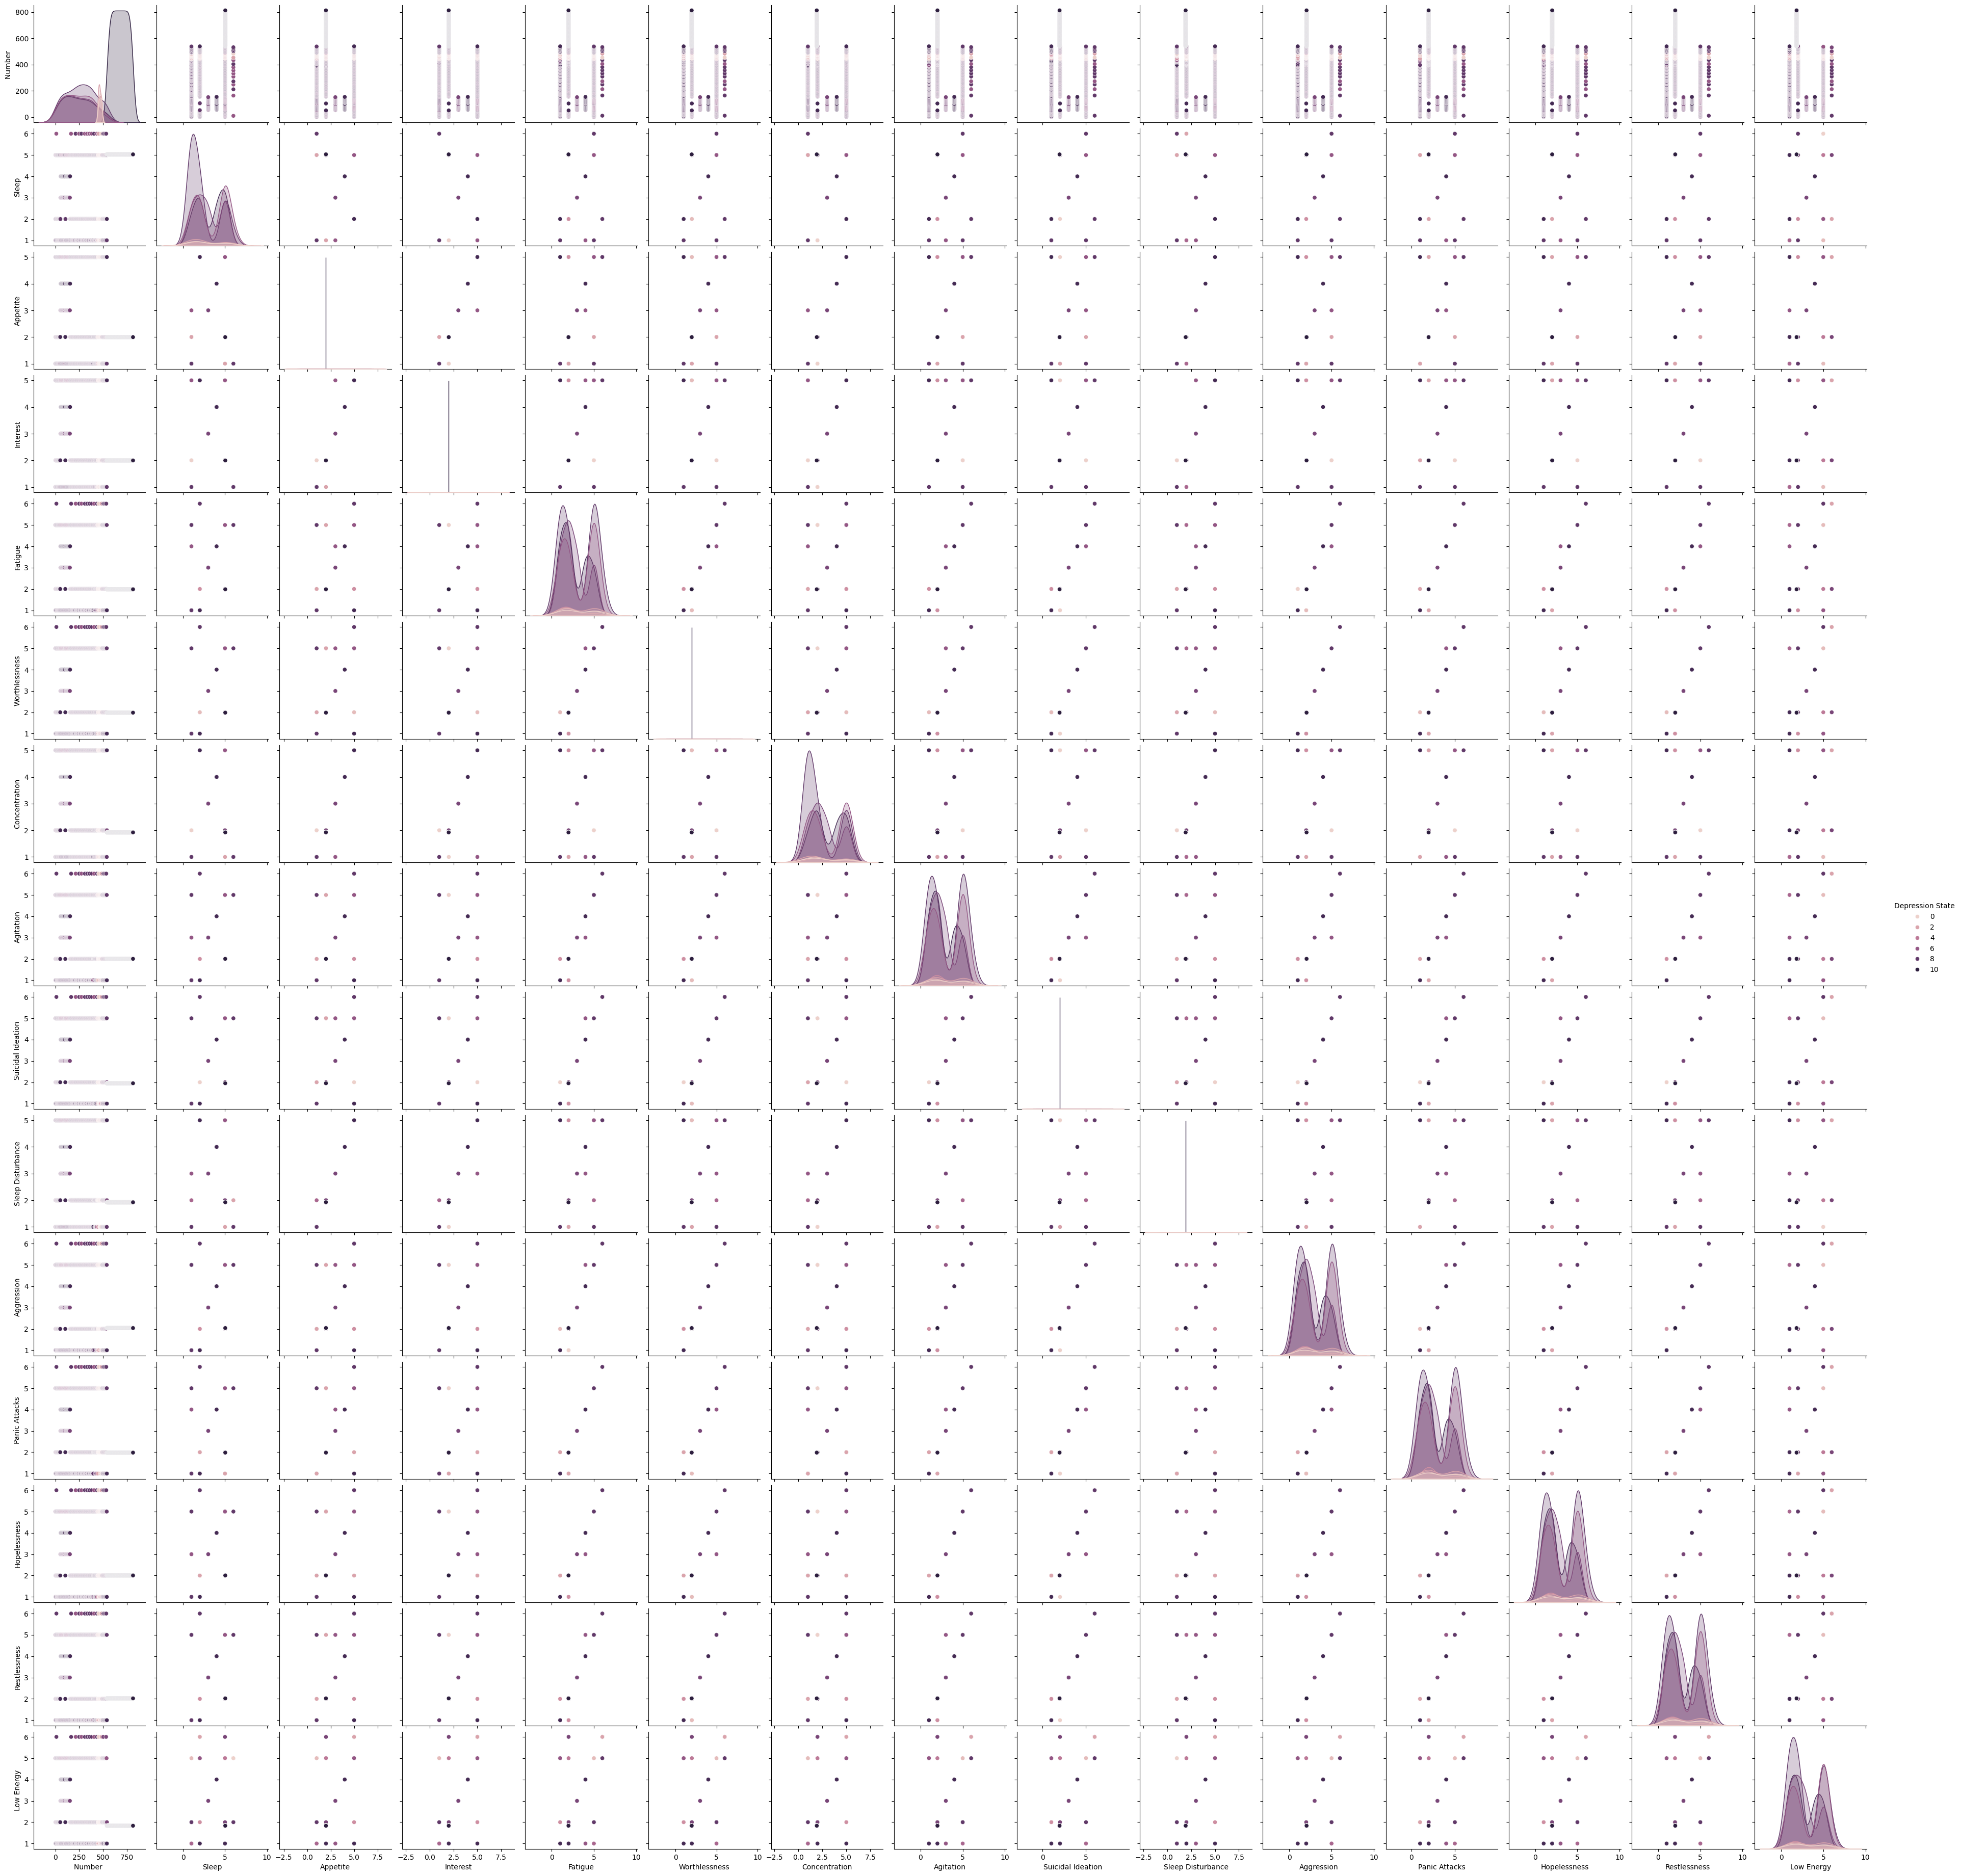

In [21]:
sns.pairplot(mod_df,hue='Depression State')

In [27]:
mod_df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

In [28]:
mod_df=mod_df.drop('Number ',axis=1)

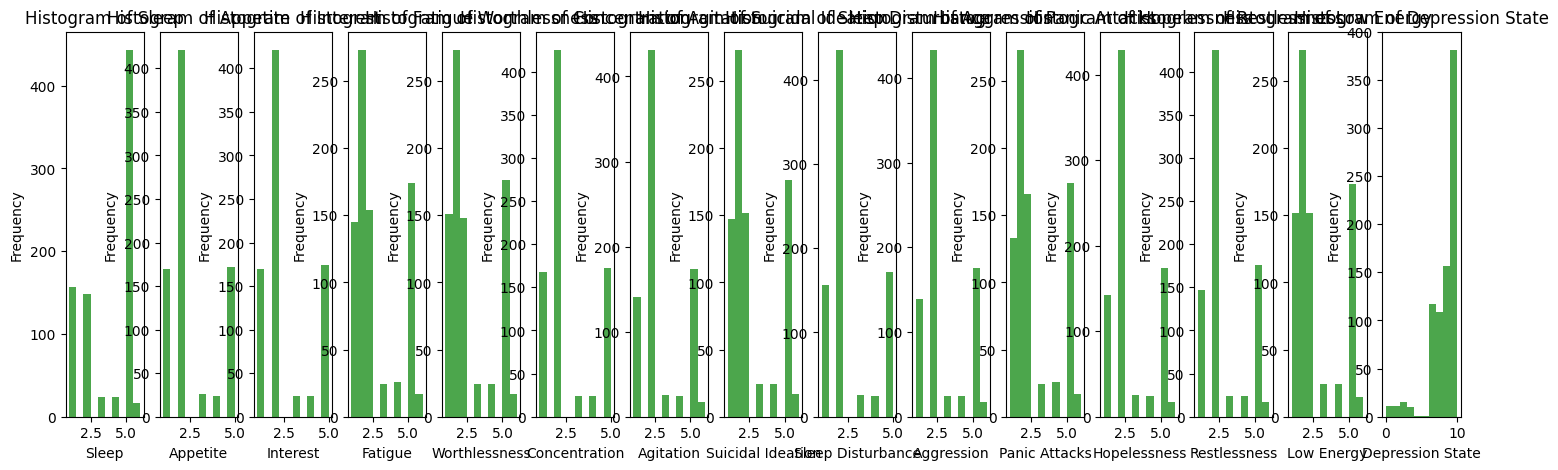

In [52]:
fig,axes = plt.subplots(ncols=len(mod_df.columns), nrows=1, figsize=(18, 5))
for i, column in enumerate(mod_df.columns):
    axes[i].hist(mod_df.loc[:,column], bins=10, alpha=0.7, color='green')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')


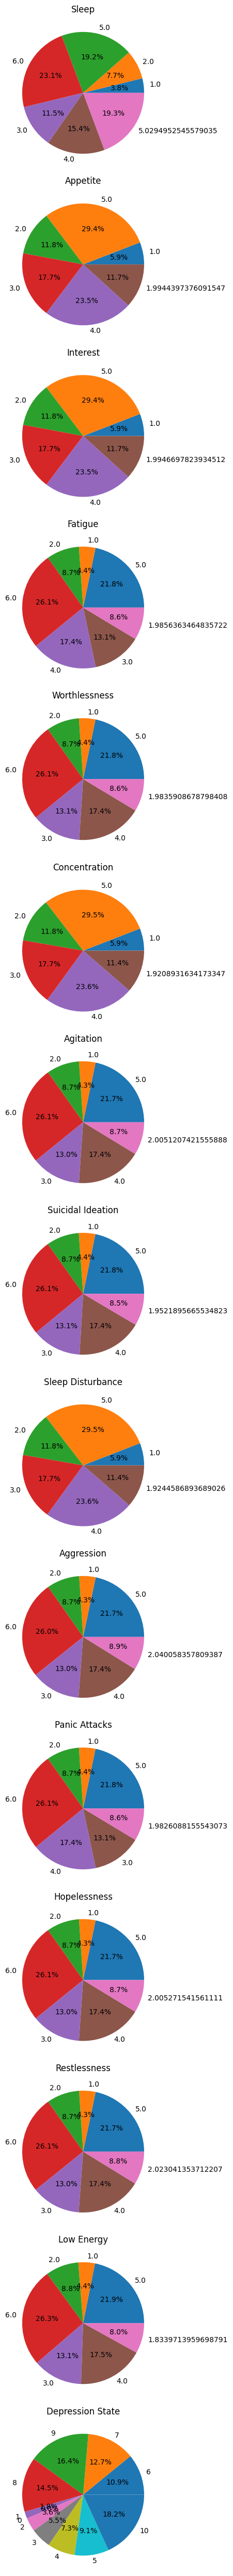

In [101]:
fig,axes=plt.subplots(ncols=1,nrows=len(mod_df.columns),figsize=(50,50))
for i,feature in enumerate(mod_df.columns):
    axes[i].pie(mod_df[feature].unique(),labels=mod_df[feature].unique(),autopct='%1.1f%%')
    axes[i].set_title(feature)
plt.tight_layout()

In [107]:
corr_features=mod_df.loc[:,['Low Energy','Panic Attacks']]

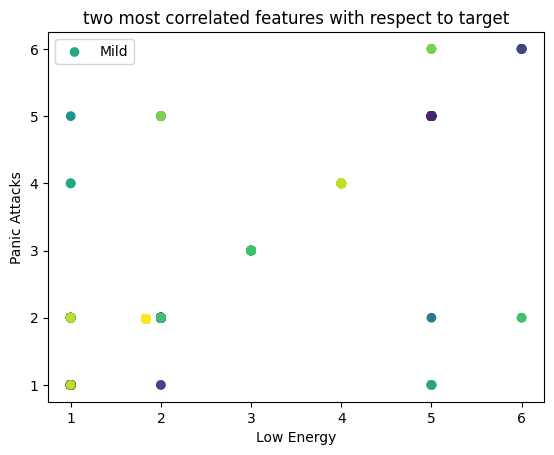

In [118]:
plt.scatter(corr_features['Low Energy'],corr_features['Panic Attacks'],c=mod_df['Depression State'],)
plt.xlabel('Low Energy')
plt.ylabel('Panic Attacks')
plt.title('two most correlated features with respect to target')
plt.legend(le.inverse_transform(mod_df['Depression State'].unique()))

In [131]:
x=mod_df.loc[:,mod_df.columns!='Depression State']
y=mod_df['Depression State']

In [129]:
x.columns

Index(['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy'],
      dtype='object')

In [135]:
print(f'the feature size is {x.shape},\n and the target size is {y.shape}')

the feature size is (813, 14),
 and the target size is (813,)


In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [172]:
# Create a decision tree classifier model
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)


model.fit(x_train,y_train)

# Make predictions using the trained model
prediction_1 = model.predict(x_test)

# Evaluate the model performance

accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5828220858895705


In [173]:
# Create a decision tree classifier model
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)


model.fit(x_train,y_train)

# Make predictions using the trained model
prediction_2 = model.predict(x_test)

# Evaluate the model performance

accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6134969325153374


In [174]:
# Create a decision tree classifier model
model = DecisionTreeClassifier(criterion='gini',max_depth=3)


model.fit(x_train,y_train)

# Make predictions using the trained model
prediction_3 = model.predict(x_test)

# Evaluate the model performance

accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5828220858895705


In [175]:
# Create a decision tree classifier model
model = DecisionTreeClassifier(criterion='gini',max_depth=4)


model.fit(x_train,y_train)

# Make predictions using the trained model
prediction_4 = model.predict(x_test)

# Evaluate the model performance

accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6134969325153374


In [176]:
#the 9 most important parameters in decision tree algorithm

1. criterion: The function to measure the quality of a split. It can be 'gini' for the Gini impurity or 'entropy' for the information gain.

2. splitter: The strategy used to choose the split at each node. It can be 'best' to choose the best split or 'random' to choose the best random split.

3. max_depth: The maximum depth of the tree. It controls the maximum depth of the tree to prevent overfitting.

4. min_samples_split: The minimum number of samples required to split an internal node. It controls the minimum number of samples required to split a node.

5. min_samples_leaf: The minimum number of samples required to be at a leaf node. It controls the minimum number of samples required to be at a leaf node.

6. max_features: The number of features to consider when looking for the best split. It controls the number of features to consider when looking for the best split.

7. max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. It controls the maximum number of leaf nodes in the tree.

8. min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value. It controls the minimum impurity decrease required for a split.

9. class_weight: Weights associated with classes in the form {class_label: weight}. It controls the weights associated with classes in the decision tree.

In [177]:
#the 9 most important parameters in random forest

1. n_estimators: The number of trees in the forest.
2. max_depth: The maximum depth of the trees.
3. min_samples_split: The minimum number of samples required to split an internal node.
4. min_samples_leaf: The minimum number of samples required to be at a leaf node.
5. max_features: The number of features to consider when looking for the best split.
6. criterion: The function to measure the quality of a split.
7. bootstrap: Whether bootstrap samples are used when building trees.
8. random_state: The seed used by the random number generator.
9. class_weight: Weights associated with classes in the form {class_label: weight}.

In [178]:
model=RandomForestClassifier(n_estimators=70 ,min_samples_split=10)
model.fit(x_train,y_train)
prediction_5=model.predict(x_test)
accuracy=model.score(x_test,y_test)
print('the accuracy is ',accuracy)

the accuracy is  0.5828220858895705


In [179]:
model=RandomForestClassifier(n_estimators=110,min_samples_split=4)
model.fit(x_train,y_train)
prediction_6=model.predict(x_test)
accuracy=model.score(x_test,y_test)
print('the accuracy is ',accuracy)

the accuracy is  0.5828220858895705


In [181]:
total_pred=[prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,prediction_6]

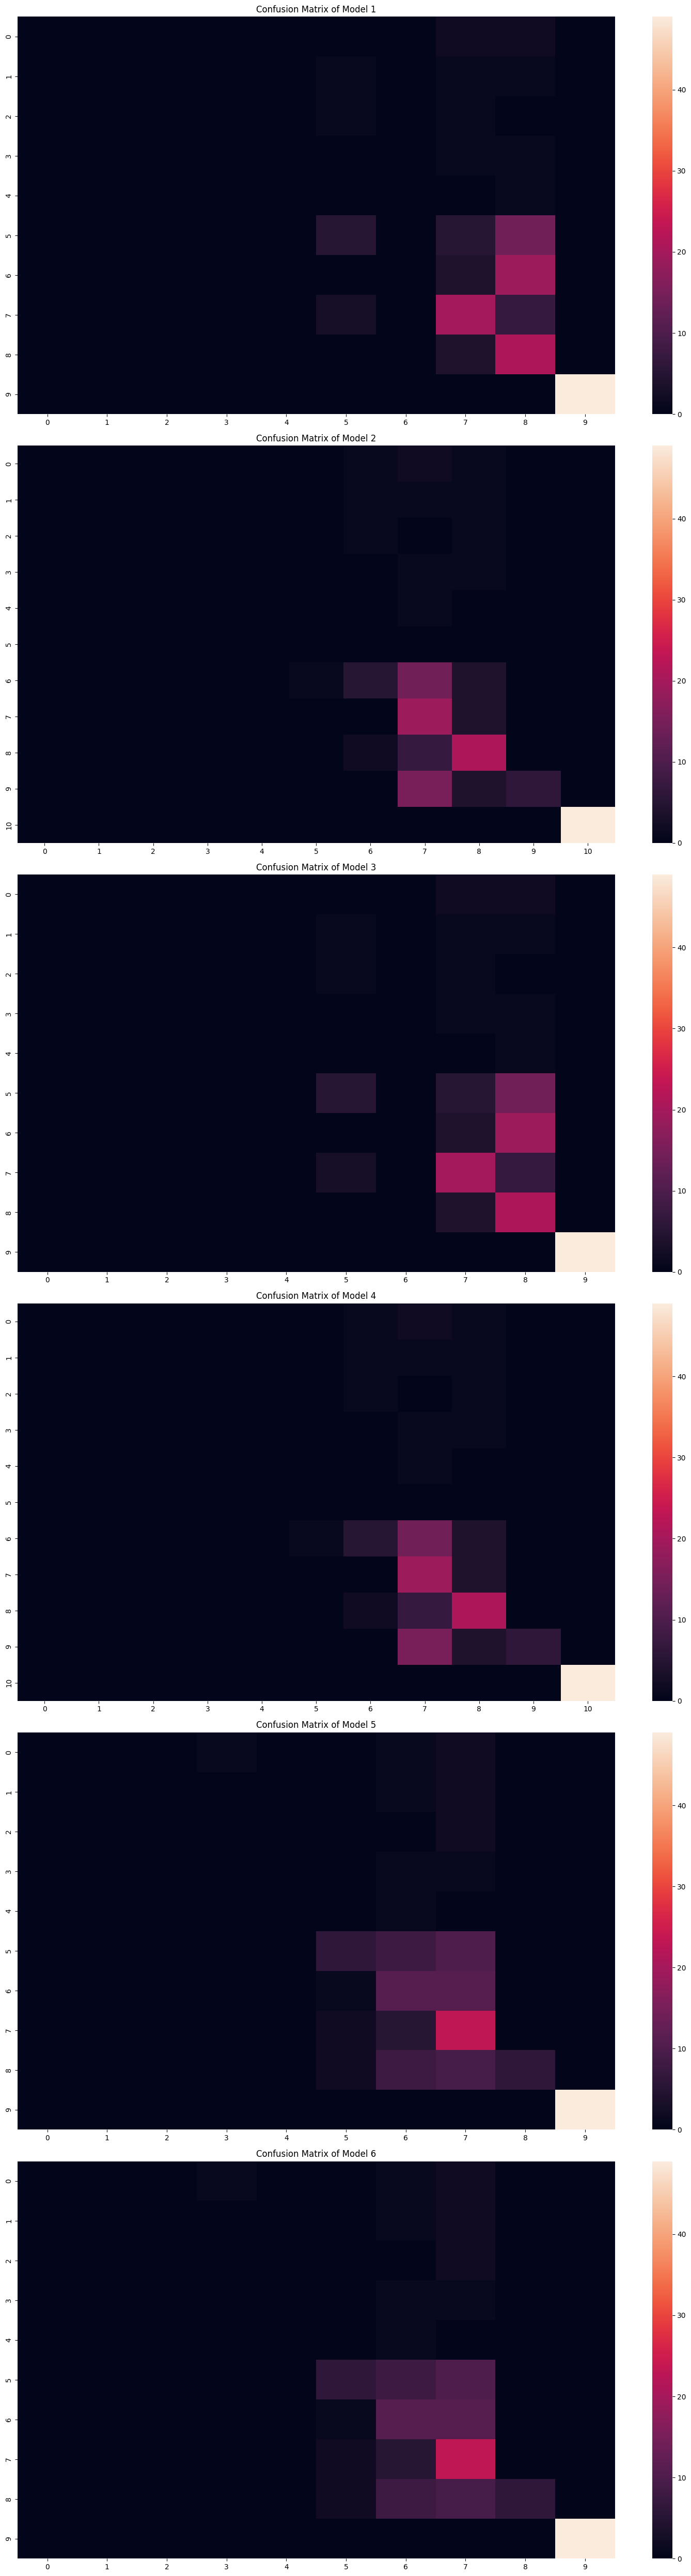

In [196]:
fig, axes = plt.subplots(nrows=len(total_pred), ncols=1, figsize=(15,50))

for i, y_pred in enumerate(total_pred):
    sns.heatmap(confusion_matrix(y_test,y_pred), ax=axes[i])
    axes[i].set_title(f'Confusion Matrix of Model {i+1}')

plt.tight_layout()
plt.show()